In [3]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rc('font',family='Malgun Gothic')   # 맑은 고딕으로 그래프한글설정

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns


In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("../03/03_암발생자수_.csv", encoding="cp949")
df.head()

,24개 암종별,성별,연령별,2019,2019.1
0,24개 암종별,성별,연령별,발생자수 (명),조발생률 (명/10만명)
1,모든 암(C00-C96),계,계,254718,496.2
2,모든 암(C00-C96),계,0-4세,406,21.3
3,모든 암(C00-C96),계,5-9세,220,9.5
4,모든 암(C00-C96),계,10-14세,300,13.0


In [6]:
df.columns = ["암종별", "성별", "연령별", "발생자수", "조발생률"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1501 non-null   object
 1   성별      1501 non-null   object
 2   연령별     1501 non-null   object
 3   발생자수    1501 non-null   object
 4   조발생률    1501 non-null   object
dtypes: object(5)
memory usage: 58.8+ KB


In [10]:
#행 열 조회(loc)
df.loc[0,'암종별']

'24개 암종별'

In [11]:
#행 열 조회(iloc)
df.iloc[0,0]

'24개 암종별'

In [13]:
#1번 행 제거
df = df.loc[1:,:]

In [15]:
#특정 행, 열 자료 추출
df.loc[[1,3],['암종별','발생자수']]

,암종별,발생자수
1,모든 암(C00-C96),254718
3,모든 암(C00-C96),220


In [14]:
#특정 변수 조회
df['암종별']

1           모든 암(C00-C96)
2           모든 암(C00-C96)
3           모든 암(C00-C96)
4           모든 암(C00-C96)
5           모든 암(C00-C96)
              ...        
1496    기타 암(Re. C00-C96)
1497    기타 암(Re. C00-C96)
1498    기타 암(Re. C00-C96)
1499    기타 암(Re. C00-C96)
1500    기타 암(Re. C00-C96)
Name: 암종별, Length: 1500, dtype: object

In [16]:
import numpy as np

In [18]:
#특정 값 변경
#ifelse = np.where
df['발생자수'] = np.where(df['발생자수'] == "-", 0, df['발생자수'])
df['조발생률'] = np.where(df['조발생률'] == "-", 0, df['조발생률'])

In [ ]:
#np.where 말고 다른 방법(replace는 문자열만 할 수 있음('0' 말고 0 은 안됨))
##데이터타입 변경까지 같이
# temp = list(df['발생자수'])
# temp = [int(s.replace('-', '0')) for s in temp]
# df['발생자수'] = temp

# temp2 = list(df['조발생률'])
# temp2 = [float(s.replace('-', '0')) for s in temp2]
# df['조발생률'] = temp2

#함수로 만들기
# def funCol(col, df):
#   temp = list(df[col])
#   temp = [float(s.replace('-', '0')) for s in temp]
#   df[col] = temp
#함수 사용
# for c in ['발생자수','조발생률']:
#   funCol(c, df)

In [21]:
#데이터 타입 변경1 (int를 문자열로 줘야함)
df['발생자수'] = df['발생자수'].astype('int')

In [23]:
#데이터 타입 변경2 (자기가 알아서 int, float 구별해서 변경)
df['조발생률'] = pd.to_numeric(df['조발생률'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   암종별     1500 non-null   object 
 1   성별      1500 non-null   object 
 2   연령별     1500 non-null   object 
 3   발생자수    1500 non-null   int32  
 4   조발생률    1500 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 52.9+ KB


In [ ]:
#암종류
lt = list(df['암종별'].unique())
lt = [s[-3:-1] for s in lt]
lt

In [ ]:
lt = [int(s) for s in lt]
lt

In [53]:
df1 = df[(df['암종별'] == '모든 암(C00-C96)') & (df['연령별'] != '계') & (df['성별'] == '계')][['연령별','발생자수']]
df1

,연령별,발생자수
2,0-4세,406
3,5-9세,220
4,10-14세,300
5,15-19세,583
6,20-24세,1344
7,25-29세,2896
8,30-34세,4652
9,35-39세,8845
10,40-44세,12427
11,45-49세,17759


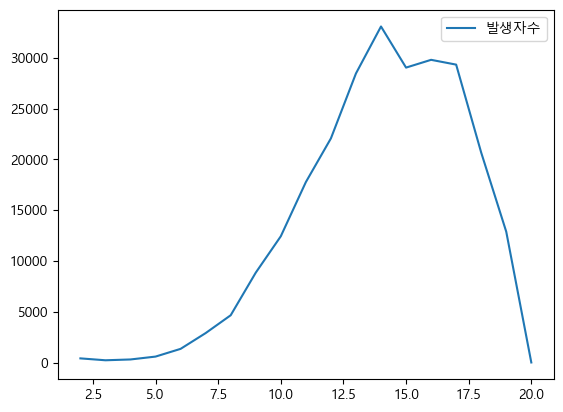

In [54]:
df1.plot()
plt.show()

In [70]:
df2 = df[(df['연령별'] != '계') & (df['암종별'] != '모든 암(C00-C96)') & (df['성별'] != '계')]
df2

,암종별,성별,연령별,발생자수,조발생률
82,"입술, 구강 및 인두(C00-C14)",남자,0-4세,0,0.0
83,"입술, 구강 및 인두(C00-C14)",남자,5-9세,1,0.1
84,"입술, 구강 및 인두(C00-C14)",남자,10-14세,3,0.3
85,"입술, 구강 및 인두(C00-C14)",남자,15-19세,7,0.5
86,"입술, 구강 및 인두(C00-C14)",남자,20-24세,18,1.0
...,...,...,...,...,...
1496,기타 암(Re. C00-C96),여자,70-74세,1096,107.6
1497,기타 암(Re. C00-C96),여자,75-79세,1357,146.3
1498,기타 암(Re. C00-C96),여자,80-84세,1420,212.1
1499,기타 암(Re. C00-C96),여자,85세이상,1273,243.6


In [68]:
df2.groupby(['암종별','성별']).mean()[['발생자수','조발생률']]

발생자수    조발생률
암종별          성별                
간(C22)       계   1560.5  38.390
             남자  1154.1  62.285
             여자   406.4  20.675
갑상선(C73)     계   3067.6  47.030
             남자   751.6  23.515
...                 ...     ...
호지킨 림프종(C81) 남자    18.1   0.680
             여자    12.7   0.515
후두(C32)      계    122.2   3.080
             남자   115.4   6.975
             여자     6.8   0.345

[75 rows x 2 columns]

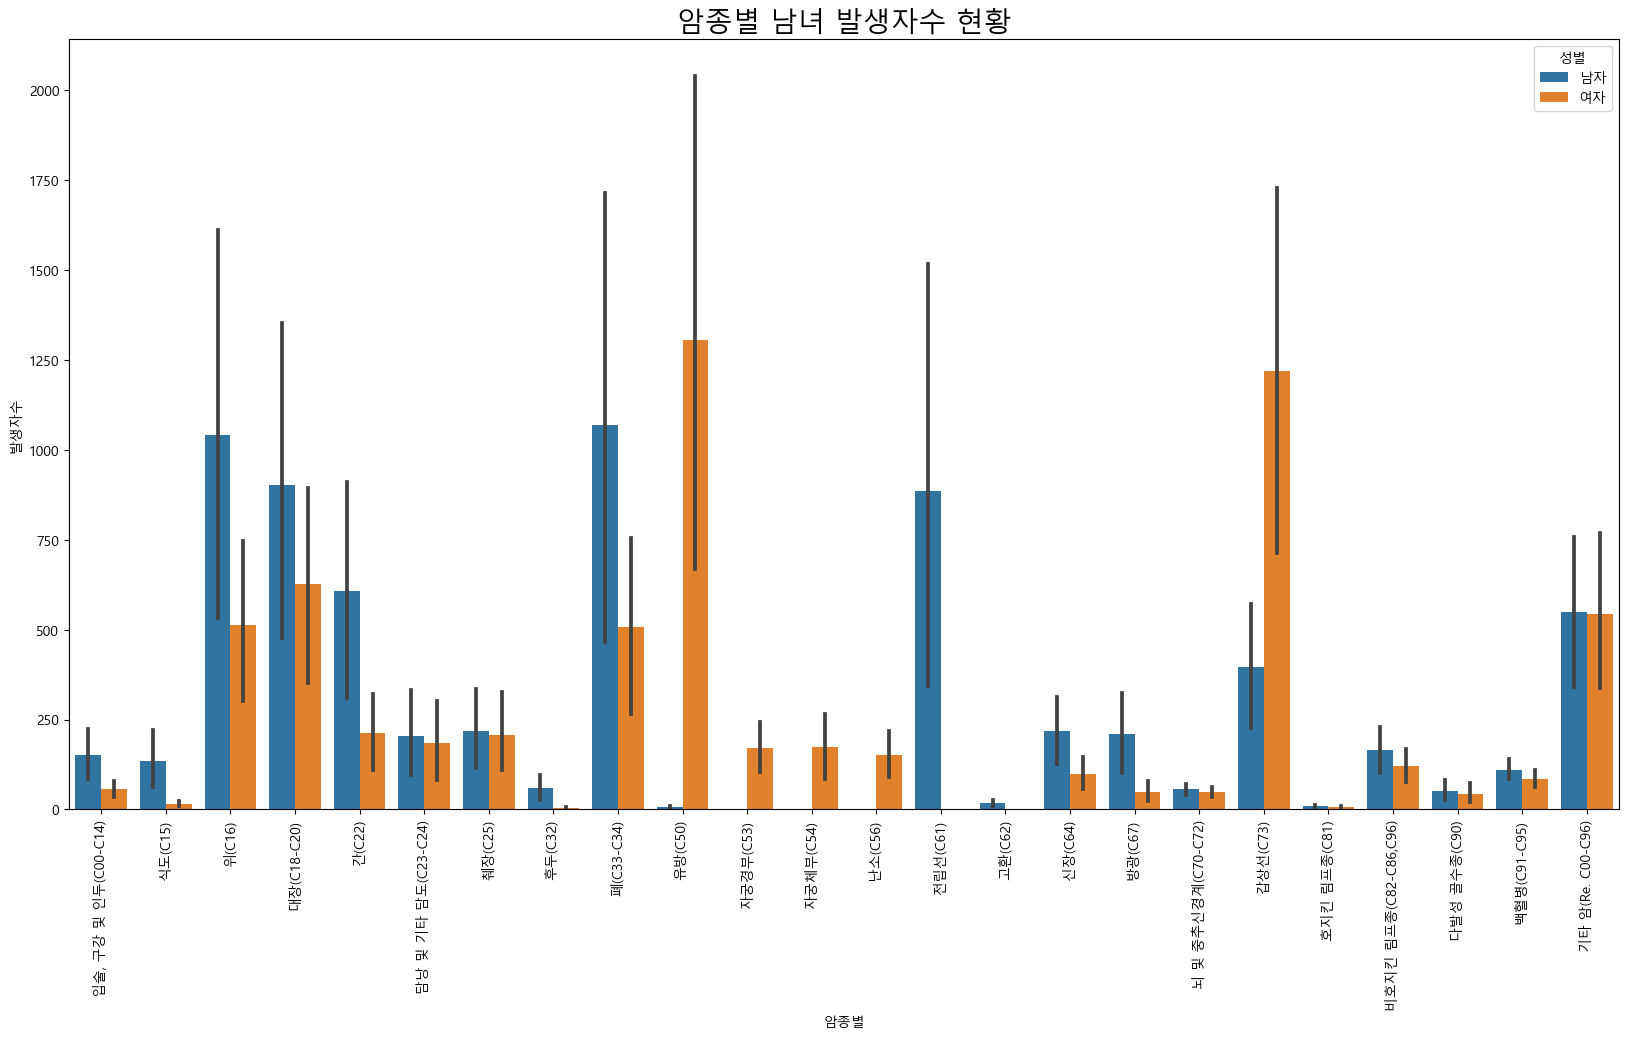

In [77]:
#seabone에서는 자동으로 평균 내줌
plt.figure(figsize=(20,10))
sns.barplot(x='암종별', y='발생자수', hue='성별', data=df2)
plt.title("암종별 남녀 발생자수 현황", fontsize = 20)
plt.xticks(rotation=90)
plt.show()